**Задание 1.**

Создайте программу, производящую чтение данных из текстового файла и подсчитывающую частоту встречаемости каждого символа в тексте. Желательно организовать сортировку символов текста по алфавиту и сортировку символов по частоте их встречаемости.

In [2]:
def frequency_of_occurrence_of_each_character(doc : str, sort=0, rev=False):
    with open(doc, encoding='utf-8') as doc:
        input_str = doc.read() # записываем все из файла

    mas_symb = []
    mas_rep_sym = []
    
    summ = 0
    for letter in input_str.replace("\n", ""): # идем по каждому символу файла, при этом заменив перевод каретки на пустой символ
        if letter not in mas_symb: # првоеряем уникальность символа
            mas_symb.append(letter) # добавляем сам символ
            summ += input_str.count(letter) # счиатем общее количество символов
            mas_rep_sym.append(input_str.count(letter)) # записываем количество повторений символа

    dict_mas = {}
    for i in range(len(mas_symb)):
        dict_mas[mas_symb[i]] = mas_rep_sym[i] # формируем массив вида {символ: количество повторений}

    sort_type = sort #= 0 по алфавиту
    # sort_type = 1 # по частоте
    
    # сортируем словарь по заданным параметрам
    sorted_tuple = dict(sorted(dict_mas.items(), key=lambda x: x[sort_type], reverse=rev)) # по возрастанию, reverse=True - по убыванию 
    return sorted_tuple, summ

sorted_tuple, summ = frequency_of_occurrence_of_each_character(doc="text.txt", sort=1, rev=True)
A = 0
for key, value in sorted_tuple.items():
    print(f"Символ '{key}' встречается - {value} раз. Частота: {value/summ}")

Символ ' ' встречается - 178 раз. Частота: 0.10873549175320708
Символ 'о' встречается - 153 раз. Частота: 0.09346365302382406
Символ 'и' встречается - 137 раз. Частота: 0.08368967623701894
Символ 'н' встречается - 121 раз. Частота: 0.07391569945021381
Символ 'а' встречается - 114 раз. Частота: 0.06963958460598656
Символ 'т' встречается - 105 раз. Частота: 0.06414172266340867
Символ 'е' встречается - 97 раз. Частота: 0.05925473427000611
Символ 'с' встречается - 82 раз. Частота: 0.0500916310323763
Символ 'р' встречается - 73 раз. Частота: 0.04459376908979841
Символ 'в' встречается - 56 раз. Частота: 0.03420891875381796
Символ 'л' встречается - 41 раз. Частота: 0.02504581551618815
Символ 'п' встречается - 40 раз. Частота: 0.02443494196701283
Символ 'д' встречается - 36 раз. Частота: 0.021991447770311544
Символ 'м' встречается - 35 раз. Частота: 0.021380574221136223
Символ 'я' встречается - 34 раз. Частота: 0.020769700671960906
Символ 'к' встречается - 34 раз. Частота: 0.020769700671960906

**Задание 2.**

Зная, что предлагаемый зашифрованный простой заменой текстовый файл содержит русскоязычный текст, определите таблицу замены, используя для этого таблицу частоты встречаемости русских букв.

In [3]:
frequency_of_occurrence = {
    "A" : 8.886972,
    "Б" : 1.466782,
    "В" : 2.933563,
    "Г" : 1.553063,
    "Д" : 2.329594,
    "Е" : 5.090595,
    "Ж" : 0.862813,
    "З" : 1.639344,
    "И" : 8.369284,
    "Й" : 0.431406,
    "К" : 3.796376,
    "Л" : 3.710095,
    "М" : 3.623814,
    "Н" : 3.192407,
    "О" : 6.471096,
    "П" : 2.243313,
    "Р" : 3.710095,
    "С" : 3.36497,
    "Т" : 3.710095,
    "У" : 3.106126,
    "Ф" : 0.200000,
    "Х" : 0.517688,
    "Ц" : 0.300000,
    "Ч" : 1.121657,
    "Ш" : 1.035375,
    "Щ" : 0.258844,
    "Ъ" : 0.100000,
    "Ы" : 1.466782,
    "Ь" : 0.69025,
    "Э" : 0.230000,
    "Ю" : 0.776531,
    "Я" : 1.898188,
    " " : 16.99741,
    "." : 2.329594,
    "," : 2.415876
}

sorted_frequency_of_occurrence = dict(sorted(frequency_of_occurrence.items(), key=lambda x: x[1], reverse=True)) # сортируем словарь частоты букв по убыванию частоты
summ_1 = sum(sorted_frequency_of_occurrence.values()) # сумма частоты всех символов

sorted_tuple, summ_2 = frequency_of_occurrence_of_each_character(doc="pluginfile.txt", sort=1, rev=True) # записываем статистику частоыт символов по входному файлу

acc_1 = []
for key, value in sorted_frequency_of_occurrence.items(): # массив с % всех символов 
    acc_1.append(value/summ_1)
    # sorted_frequency_of_occurrence[key] = [value, value/summ_1]

acc_2 = []
for key, value in sorted_tuple.items(): # массив с % всех символов 
    acc_2.append(value/summ_2)
    # sorted_tuple[key] = [value, value/summ_2]
    
# shema = { list(sorted_tuple)[x] : list(sorted_frequency_of_occurrence)[x] for x in range(len(list(sorted_tuple.keys())))}
shema = {}
a = 0.01 # погрешность
for i in range(len(sorted_tuple.keys())):
    if (acc_2[i] <= (acc_1[i] + a)) and (acc_2[i] >= (acc_1[i] - a)): # подбираем символ, учитывая погрешность
        shema[list(sorted_tuple.keys())[i]] = list(sorted_frequency_of_occurrence.keys())[i] # формируем схему

shema

100.82999800000002


{'Ы': ' ',
 'У': 'A',
 'Ж': 'И',
 'К': 'О',
 'Ъ': 'Е',
 'Е': 'К',
 'Ь': 'Л',
 'Ц': 'Р',
 'Ю': 'Т',
 'И': 'М',
 'Й': 'С',
 'Р': 'Н',
 'О': 'У',
 'С': 'В',
 'Ф': ',',
 'Т': 'Д',
 'Л': '.',
 'Д': 'П',
 'Ч': 'Я',
 'Ш': 'З',
 'Щ': 'Г',
 'Х': 'Б',
 'Я': 'Ы',
 'Б': 'Ч',
 'З': 'Ш',
 'В': 'Ж',
 'А': 'Ю',
 'М': 'Ь',
 'Г': 'Х',
 'Н': 'Й',
 'П': 'Ц'}

**Задание 3.**

Создайте программу расшифровки шифротекста в предложенном файле по составленной в задании 2. таблице замены.

In [30]:
with open("pluginfile.txt", encoding='utf-8') as doc:
    input_str = doc.read()

decrypted = ""
for letter in input_str:
    decrypted += shema[letter]

print(decrypted)

ЕЙAЛИ МЕДВЕДИ НA ВЕЛОСИПЕДЕ. A ЗA НИМИ КОР ЗAДОМ НAПЕТЕД. A ЗA НИМ КОМAТИКИ НA ВОЗДУЖНОМ ЖAТИКЕ. A ЗA НИМИ ТAКИ НA ЙТОМОЧ СОБAКЕ. ВОЛКИ НA КОБЫЛЕ. ЛХВЫ В AВРОМОБИЛЕ. ЗAЧШИКИ В РТAМВAЧШИКЕ. ЮAБA НA МЕРЛЕ. ЕДУР И СМЕЬРСЯ, ПТЯНИКИ ЮУЬР. ВДТУГ ИЗ ПОДВОТОРНИ СРТAЖНЫЧ ВЕЛИКAН, ТЫЮИЧ И УСAРЫЧ РAТAКAН. РAТAКAН, РAТAКAН, РAТAКAНИЦЕ. ОН ТЫШИР, И КТИШИР, И УСAМИ ЖЕВИЛИР. ПОГОДИРЕ, НЕ СПЕЖИРЕ, Я ВAС МИГОМ ПТОГЛОШУ. ПТОГЛОШУ, ПТОГЛОШУ, НЕ ПОМИЛУЬ. ЗВЕТИ ЗAДТОЮAЛИ, В ОБМОТОК УПAЛИ. ВОЛКИ ОР ИСПУГA СКУЖAЛИ ДТУГ ДТУГA. БЕДНЫЧ КТОКОДИЛ ЮAБУ ПТОГЛОРИЛ. A СЛОНИЙA, ВСЯ ДТОЮA, РAК И СЕЛA НA ЕЮA. РОЛХКО ТAКИ ЗAБИЯКИ НЕ БОЯРСЯ БОЬ ДТAКИ. ЙОРХ И ПЯРЯРСЯ НAЗAД, НО УСAМИ ЖЕВЕЛЯР И КТИШAР ВЕЛИКAНУ УСAРОМУ, НЕ КТИШИ И НЕ ТЫШИ, МЫ И СAМИ С УСAМИ, МОЮЕМ МЫ И СAМИ ЖЕВЕЛИРХ УСAМИ. И НAЗAД ЕЦЕ ДAЛХЖЕ ПОПЯРИЛИСХ. И СКAЗAЛ ГИППОПОРAМ КТОКОДИЛAМ И КИРAМ, КРО ЗЛОДЕЯ НЕ БОИРСЯ И С ШУДОВИЦЕМ СТAЗИРСЯ Я РОМУ БОГAРЫТЬ ДВУЙ ЛЯГУЖЕК ПОДAТЬ И ЕЛОВУЬ ЖИЖКУ ПОЮAЛУЬ. НЕ БОИМСЯ МЫ ЕГО, ВЕЛИКAНA РВОЕГО. МЫ ЗУБAМИ, МЫ КЛЫКAМИ, МЫ КОПЫ

**Задание 4.**

Шифрование текста было выполнено методом перестановки. Исходный текст вписывался в таблицу 15x15 по столбцам, а строки этой таблицы были разбиты на слова по 5 символов и составили данный шифротекст. Расшифруйте исходный текст, представленный шифротекстом.

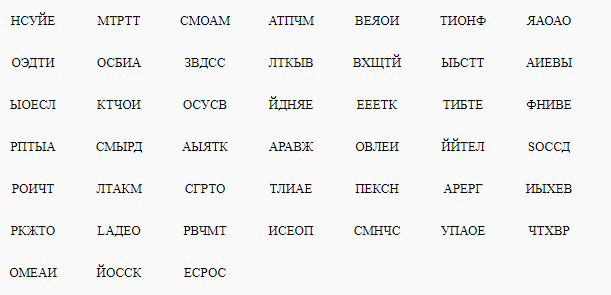

In [62]:
encrypted = [
    "НСУЙЕ", "МТРТТ", "СМОАМ", "АТПЧМ", "ВЕЯОИ", "ТИОНФ", "ЯАОАО",
    "ОЭДТИ", "ОСБИА", "ЗВДСС", "ЛТКЫВ", "ВХЩТЙ", "ЫЬСТТ", "АИЕВЫ",
    "ЫОЕСЛ", "КТЧОИ", "ОСУСВ", "ЙДНЯЕ", "ЕЕЕТК", "ТИБТЕ", "ФНИВЕ",
    "PПТЫА", "СМЫРД", "АЫЯТК", "AРАВЖ", "ОВЛЕИ", "ЙЙТЕЛ", "SОССД",
    "РОИЧТ", "ЛТАКМ", "CГРТО", "ТЛИАЕ", "ПЕКСН", "AРЕРГ", "ИЫХЕВ",
    "РКЖТО", "LАДЕО", "РВЧМТ", "ИСЕОП", "СМНЧС", "УПАОЕ", "ЧТХВР",
    "ОМЕАИ", "ЙОССК", "ЕСРОС"
]

decrypted = [["" for _ in range(5)] for _ in range(3)]

for i in range(len(encrypted)):
    if i%3 == 0:
        decrypted[0][0] += encrypted[i][0]
        decrypted[0][1] += encrypted[i][1]
        decrypted[0][2] += encrypted[i][2]
        decrypted[0][3] += encrypted[i][3]
        decrypted[0][4] += encrypted[i][4]
    if i%3 == 1:
        decrypted[1][0] += encrypted[i][0]
        decrypted[1][1] += encrypted[i][1]
        decrypted[1][2] += encrypted[i][2]
        decrypted[1][3] += encrypted[i][3]
        decrypted[1][4] += encrypted[i][4]
    if i%3 == 2:
        decrypted[2][0] += encrypted[i][0]
        decrypted[2][1] += encrypted[i][1]
        decrypted[2][2] += encrypted[i][2]
        decrypted[2][3] += encrypted[i][3]
        decrypted[2][4] += encrypted[i][4]

decrypted_str = ""
for el in decrypted:
    for word in el:
        decrypted_str += word
print(decrypted_str)

НАЯЗЫКЕPASCALСОСТАВЬТЕПРОГРАММУПОДСЧЕТАСРЕДНЕЙЧАСТОТЫВСТРЕЧАЕМОСТИКАЖДОГОСИМВОЛАОТСОРТИРУЙТЕЭТИСИМВОЛЫВПОРЯДКЕУБЫЛИИХЧАСТОТЫВСТРЕЧАЕМОСТИИВЫВЕДИТЕВТЕКСТОВЫЙФАЙЛПРИЧЕМИСХОДНЫЙТЕКСТСООБЩЕНИЯТАКЖЕХРАНИТСЯВТЕКСТОВОМФАЙЛЕЕКЛМНОПРС
